<a href="https://colab.research.google.com/github/Trrunghau/AI/blob/week9/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from keras.datasets import fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

.. 1


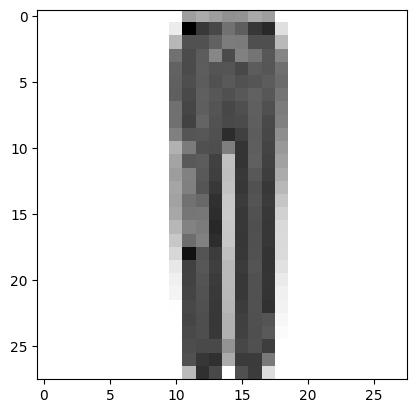

In [17]:
hinh = train_images[1000]
import matplotlib.pyplot as plt

plt.imshow(hinh,cmap = plt.cm.binary)
plt.show
print('..',train_labels[1000])


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

In [13]:
classes = ['T_shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

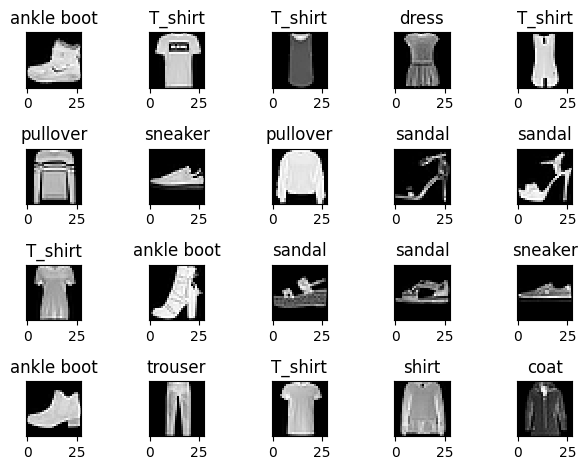

In [20]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap='gray',interpolation='none')
  plt.title('{}'.format(classes[train_labels[i]]))
  plt.xticks
  plt.yticks([])

In [4]:
from keras import models
from keras.layers import Dense

In [5]:
from keras.models.cloning import Sequential
model=Sequential()
model.add(Dense(512,activation='relu',input_shape = (28*28,),name='layout1'))
#model.add(Dense(512,activation='relu',name='layout2'))
model.add(Dense(10,activation='softmax',name='layoutN')) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layout1 (Dense)             (None, 512)               401920    
                                                                 
 layoutN (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
train_images=train_images.reshape((60000,28*28)) # đổi đầu vào thành 1 dãy
train_images=train_images.astype('float32')/255 # đổi kiểu int sang float
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

from keras.utils import to_categorical  # chuyển output sang số 1 nổi, 1 lần  
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

In [7]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics= ['accuracy'])
model.fit(train_images,train_labels,epochs=15,batch_size=128)
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('độ chính xác:',test_acc)
print('hàm mất mát',test_loss)

Epoch 1/15
469/469 [==============================] - 10s 19ms/step - loss: 0.5584 - accuracy: 0.8005
Epoch 2/15
469/469 [==============================] - 9s 20ms/step - loss: 0.3831 - accuracy: 0.8589
Epoch 3/15
469/469 [==============================] - 6s 12ms/step - loss: 0.3394 - accuracy: 0.8749
Epoch 4/15
469/469 [==============================] - 5s 11ms/step - loss: 0.3116 - accuracy: 0.8847
Epoch 5/15
469/469 [==============================] - 5s 10ms/step - loss: 0.2939 - accuracy: 0.8901
Epoch 6/15
469/469 [==============================] - 6s 12ms/step - loss: 0.2787 - accuracy: 0.8963
Epoch 7/15
469/469 [==============================] - 5s 10ms/step - loss: 0.2662 - accuracy: 0.9014
Epoch 8/15
469/469 [==============================] - 5s 10ms/step - loss: 0.2547 - accuracy: 0.9049
Epoch 9/15
469/469 [==============================] - 7s 15ms/step - loss: 0.2435 - accuracy: 0.9095
Epoch 10/15
469/469 [==============================] - 5s 10ms/step - loss: 0.2356 - accur

In [8]:
model.save('fashion_mnist.h5')

In [9]:
from keras.models import load_model
model11 = load_model('fashion_mnist.h5')
model11.summary()
print(model11.predict([test_images]))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layout1 (Dense)             (None, 512)               401920    
                                                                 
 layoutN (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 4ms/step
[[1.5417848e-08 5.3910915e-10 7.9273615e-10 ... 1.1736011e-03
  2.9257988e-08 9.9868238e-01]
 [1.1184202e-04 8.6591094e-15 9.9956971e-01 ... 3.1110726e-13
  1.5366361e-13 3.0044188e-13]
 [5.9263477e-10 9.9999994e-01 1.7438412e-13 ... 4.3791696e-13
  1.1121553e-12 2.8591534e-15]
 ...
 [6.4601312e-07 5.3955397e-15 1.9949391e-08 ... 8.1763567e-08
  9.9999911e-01 2.8489689e-13]
 [1.7782870e-0

1/1 [==============================] - 0s 73ms/step
dự đoán:  sneaker


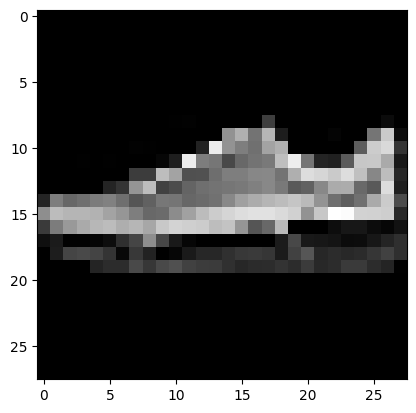

In [47]:
plt.imshow(test_images[9].reshape(28,28), cmap='gray')
import numpy as np
y_predict = model11.predict(test_images[9].reshape(1,28*28))
print('dự đoán: ', classes[np.argmax(y_predict)])

1/1 [==============================] - 0s 25ms/step
0
dự đoán:  T_shirt


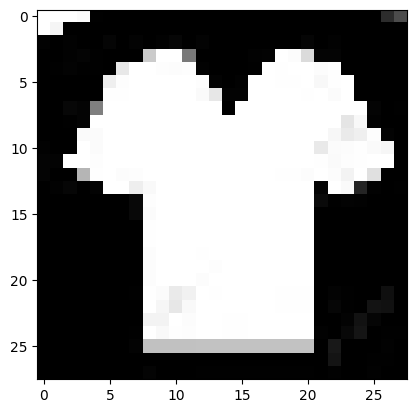

In [51]:
from keras.utils import load_img
from keras.utils import img_to_array
import matplotlib.pyplot as plt
import numpy as np

img = load_img(r'hinhtshirt.jpg', target_size=(28,28))
img = img.convert('L')
plt.imshow(img,cmap='gray')

img = img_to_array(img)
img = img.reshape(1,28*28)
img = img.astype('float32') / 255.0
kq = model11.predict(img.reshape(1,28*28))
print(np.argmax(kq))
print('dự đoán: ', classes[np.argmax(kq)])

0
1/1 [==============================] - 0s 25ms/step


'ankle boot'

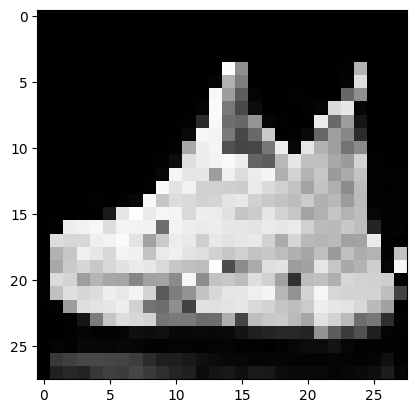

In [53]:
img = load_img(r'sneaker.jpg', target_size=(28,28))
img = img.convert('L')
plt.imshow(img,cmap='gray')
img = img_to_array(img)
img = img.reshape(1,28*28)
img = img.astype('float32') / 255

print(np.argmax(kq))
classes[np.argmax(model11.predict(img))]